In [43]:
%pip install pandas
%pip install openpyxl
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split

# Data Loading and Initial Exploration

In [4]:
df1 = pd.read_excel('Dataset/Internal_Bank_Dataset.xlsx')
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [5]:
df2 = pd.read_excel('Dataset/External_Cibil_Dataset.xlsx')
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


# Merging the bank and cibl datasets 

In [7]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd.merge(df1, df2, how='inner', left_on=['PROSPECTID'], right_on=['PROSPECTID'])

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  pct_tl_close

# Data Preprocessing

## Encoding Categorical Variables

In [9]:
col = ["MARITALSTATUS","EDUCATION","GENDER","last_prod_enq2","first_prod_enq2","CC_Flag","PL_Flag","HL_Flag","GL_Flag"]

df = pd.get_dummies(df, columns=col, drop_first=True)

In [10]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,Credit_Score,Approved_Flag,MARITALSTATUS_Single,EDUCATION_GRADUATE,EDUCATION_OTHERS,EDUCATION_POST-GRADUATE,EDUCATION_PROFESSIONAL,EDUCATION_SSC,EDUCATION_UNDER GRADUATE,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,CC_Flag_1,PL_Flag_1,HL_Flag_1,GL_Flag_1
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,48,51000,114,0.200,0.0,0.798,-99999.0,0.798,0.0,0.0,0.0,0.0,13.333,696,P2,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,23,19000,50,1.000,0.0,0.370,-99999.0,-99999.000,0.0,0.0,0.0,0.0,0.860,685,P2,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,40,18,191,1.000,0.5,0.585,-99999.0,-99999.000,0.0,0.0,0.0,0.0,5741.667,693,P2,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,34,10000,246,1.000,1.0,0.990,-99999.0,-99999.000,0.0,0.0,0.0,0.0,9.900,673,P2,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,48,15000,75,0.333,0.0,0.000,-99999.0,-99999.000,0.0,0.0,0.0,0.0,-99999.000,753,P1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

In [11]:
# handling duplicates
df.drop_duplicates(inplace=True)

In [12]:
# handling null values (dataset considers -99999 as null)
df.replace(-99999, np.nan, inplace=True)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,Credit_Score,Approved_Flag,MARITALSTATUS_Single,EDUCATION_GRADUATE,EDUCATION_OTHERS,EDUCATION_POST-GRADUATE,EDUCATION_PROFESSIONAL,EDUCATION_SSC,EDUCATION_UNDER GRADUATE,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,CC_Flag_1,PL_Flag_1,HL_Flag_1,GL_Flag_1
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,0,0,0.000,0.00,0,0,0,0,1,0,4,1,4,0,72.0,18.0,549.0,35.0,15.0,11,29.0,29,0,0,0,NaN,NaN,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6.0,0.0,0.0,0.0,6.0,0.0,0.0,566.0,0.0,0.0,0.0,48,51000,114,0.200,0.0,0.798,NaN,0.798,0.0,0.0,0.0,0.0,13.333,696,P2,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,1,0,1.000,0.00,0,0,0,1,0,0,0,0,1,0,7.0,7.0,47.0,NaN,NaN,0,NaN,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,1.0,0.0,0.0,23,19000,50,1.000,0.0,0.370,NaN,NaN,0.0,0.0,0.0,0.0,0.860,685,P2,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,2,0,0.250,0.00,1,1,0,6,1,0,0,2,6,0,47.0,2.0,302.0,11.0,3.0,9,25.0,25,1,9,8,25.0,25.0,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4.0,0.0,0.0,0.0,0.0,0.0,0.0,587.0,0.0,0.0,0.0,40,18,191,1.000,0.5,0.585,NaN,NaN,0.0,0.0,0.0,0.0,5741.667,693,P2,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,1,0,1.000,0.00,1,0,0,0,0,0,0,0,1,1,5.0,5.0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,10000,246,1.000,1.0,0.990,NaN,NaN,0.0,0.0,0.0,0.0,9.900,673,P2,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,0,0,0.000,0.00,0,1,0,0,0,0,0,3,0,2,131.0,32.0,583.0,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3951.0,0.0,0.0,0.0,48,15000,75,0.333,0.0,0.000,NaN,NaN,0.0,0.0,0.0,0.0,NaN,753,P1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,1,0,0.333,0.00,

In [13]:
# There are no missing values so we dont need to do imputation 

## Target variable conversion

Converting target into usable binary value

In [14]:
df["Approved_Flag"].value_counts()

Approved_Flag
P2    32199
P3     7452
P4     5882
P1     5803
Name: count, dtype: int64

In [15]:
# priority 1, 2 = low risk, safe to approve
# priority 3, 4 = high risk, not safe to approve

df["Approved_Flag_binary"] = df["Approved_Flag"].map({
    "P1": 0,
    "P2": 0,
    "P3": 1,
    "P4": 1
})

## Final Feature Matrix

In [16]:
X = df.drop(columns=["PROSPECTID", "Approved_Flag", "Approved_Flag_binary"])
y = df["Approved_Flag_binary"]

## Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

## Class Distribution

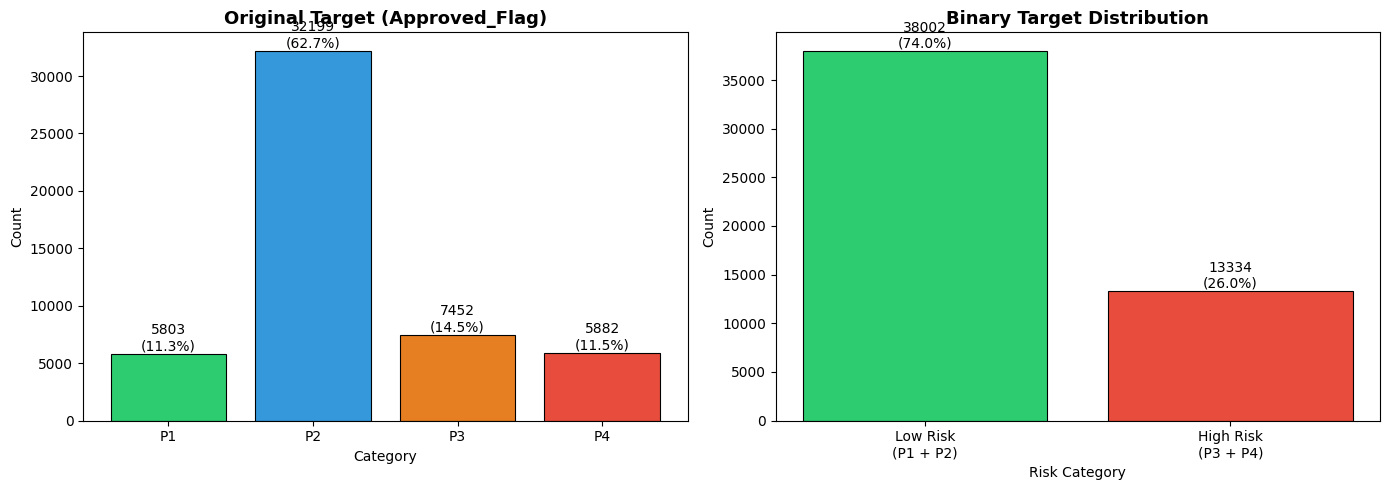


Imbalance ratio (Low Risk : High Risk) = 2.85 : 1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- original 4-class distribution ----
class_counts = df["Approved_Flag"].value_counts().sort_index()
colors = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c']

bars = axes[0].bar(class_counts.index, class_counts.values,
                   color=colors, edgecolor='black', linewidth=0.8)
axes[0].set_title("Original Target (Approved_Flag)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
total = class_counts.sum()
for bar, count in zip(bars, class_counts.values):
    pct = count / total * 100
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
                 f'{count}\n({pct:.1f}%)', ha='center', fontsize=10)
# ---- binary distribution ----
binary_counts = df["Approved_Flag_binary"].value_counts().sort_index()
labels = ["Low Risk\n(P1 + P2)", "High Risk\n(P3 + P4)"]
bars2 = axes[1].bar(labels, binary_counts.values,
                    color=['#2ecc71','#e74c3c'], edgecolor='black', linewidth=0.8)
axes[1].set_title("Binary Target Distribution", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Risk Category")
axes[1].set_ylabel("Count")
for bar, count in zip(bars2, binary_counts.values):
    pct = count / total * 100
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
                 f'{count}\n({pct:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nImbalance ratio (Low Risk : High Risk) = {binary_counts[0] / binary_counts[1]:.2f} : 1")                 

## Correlation Analysis

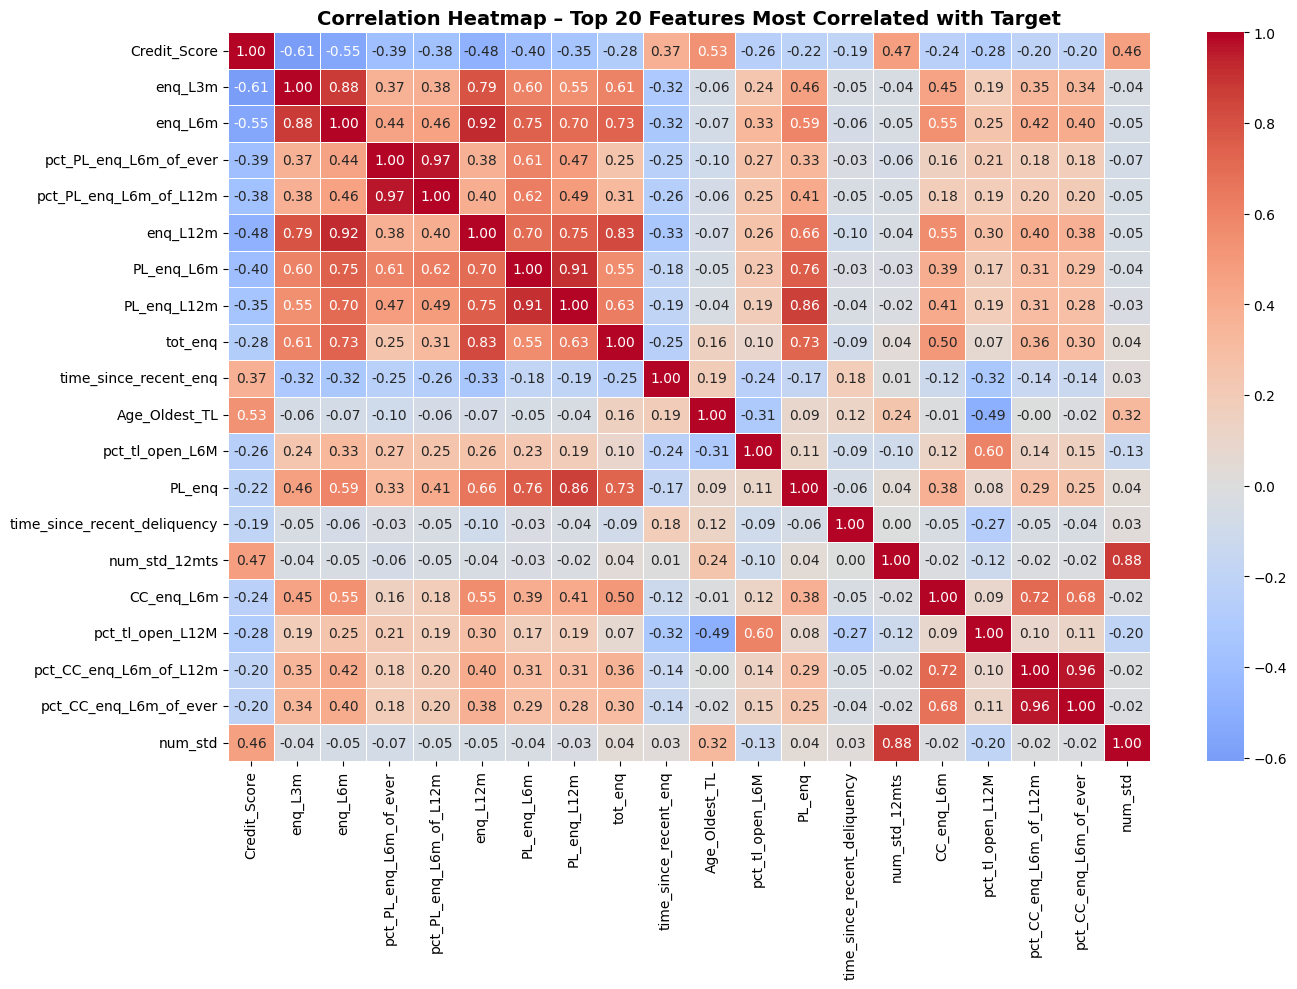


Top 20 features correlated with Approved_Flag_binary:

Credit_Score                    0.643964
enq_L3m                         0.473760
enq_L6m                         0.423781
pct_PL_enq_L6m_of_ever          0.384625
pct_PL_enq_L6m_of_L12m          0.378286
enq_L12m                        0.373571
PL_enq_L6m                      0.316452
PL_enq_L12m                     0.274362
tot_enq                         0.244706
time_since_recent_enq           0.238077
Age_Oldest_TL                   0.214075
pct_tl_open_L6M                 0.207604
PL_enq                          0.194888
time_since_recent_deliquency    0.187238
num_std_12mts                   0.171823
CC_enq_L6m                      0.171343
pct_tl_open_L12M                0.169714
pct_CC_enq_L6m_of_L12m          0.166504
pct_CC_enq_L6m_of_ever          0.166339
num_std                         0.164496


In [19]:
# select only numeric columns for correlation
numeric_cols = X.select_dtypes(include=[np.number]).columns
corr_matrix = X[numeric_cols].corr()

# plot a heatmap of the top features most correlated with the target
target_corr = X[numeric_cols].corrwith(y).abs().sort_values(ascending=False)
top_features = target_corr.head(20).index.tolist()

plt.figure(figsize=(14, 10))
sns.heatmap(X[top_features].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap – Top 20 Features Most Correlated with Target",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# show the top 20 features and their correlation with the binary target
print("\nTop 20 features correlated with Approved_Flag_binary:\n")
print(target_corr.head(20).to_string())


## Key Risk Indicators

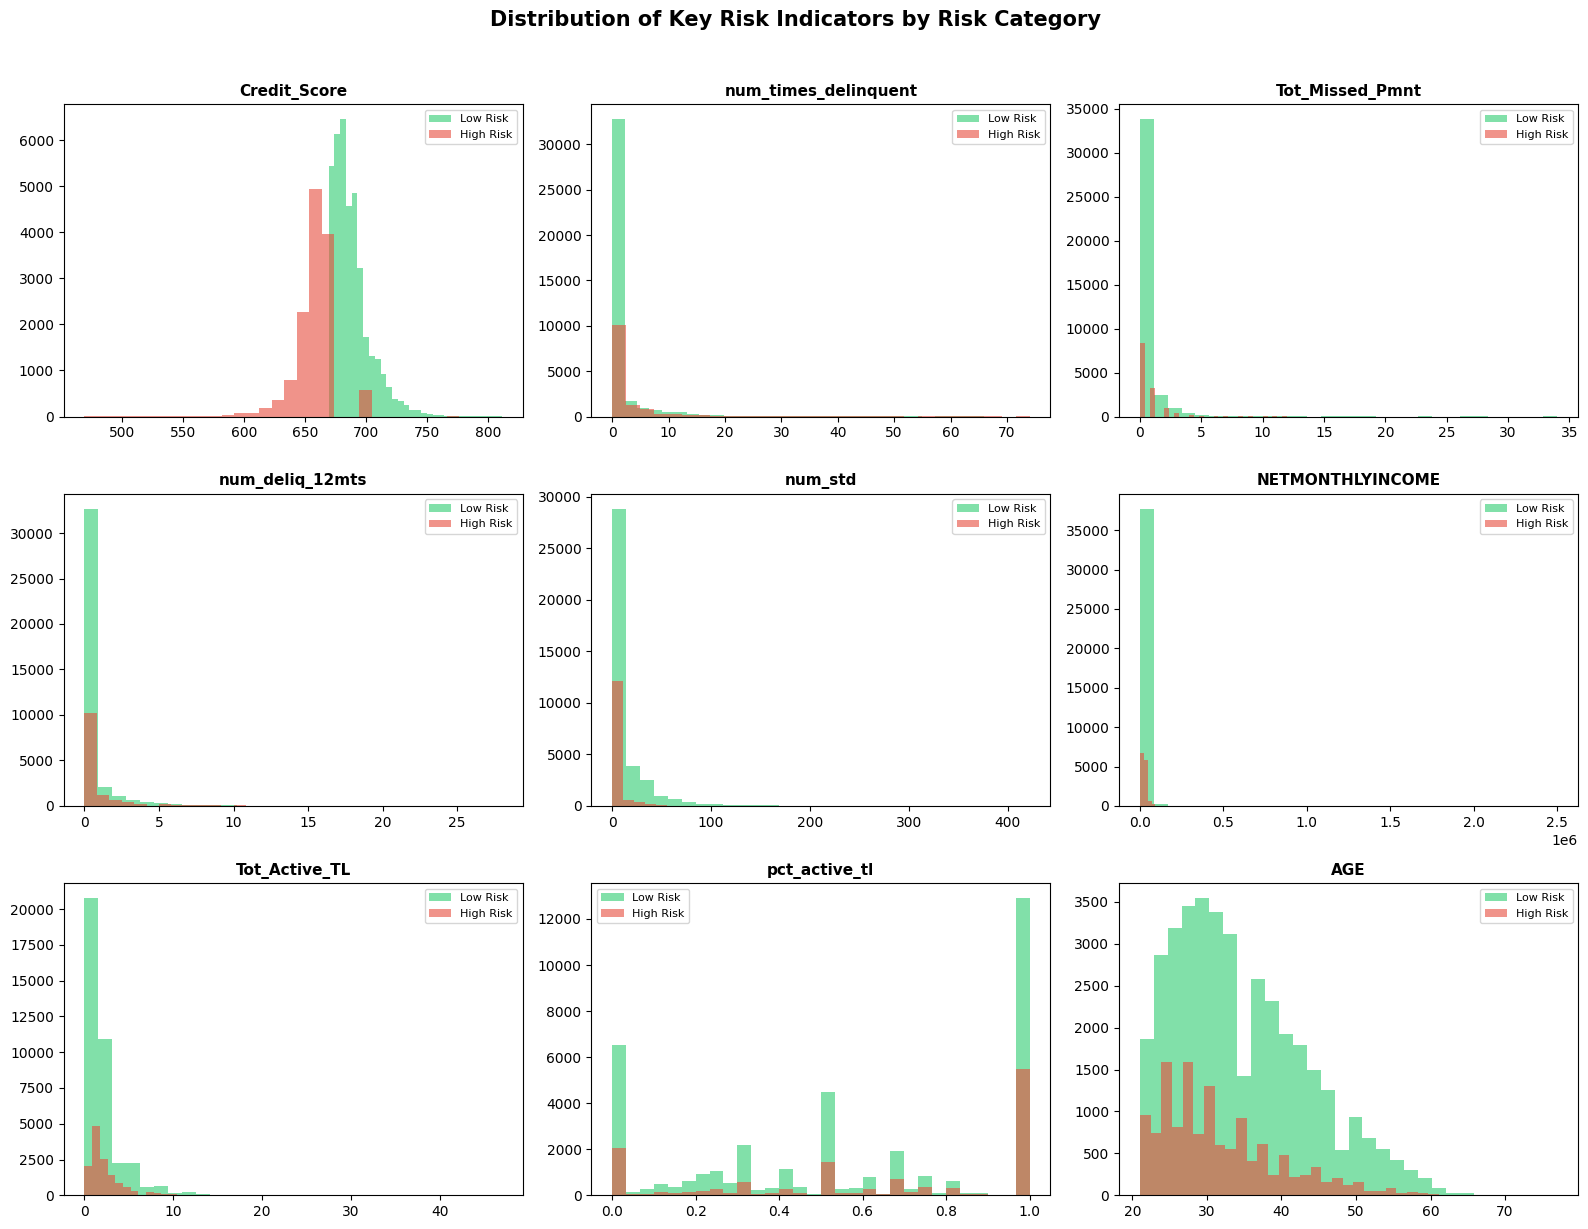


Mean values by risk group:

                      Low Risk (mean)  High Risk (mean)  Difference
Credit_Score                   687.68            657.57      -30.11
num_times_delinquent             1.35              2.22        0.88
Tot_Missed_Pmnt                  0.53              0.59        0.05
num_deliq_12mts                  0.41              0.67        0.26
num_std                         11.28              3.29       -7.99
NETMONTHLYINCOME             26373.09          26569.82      196.73
Tot_Active_TL                    2.06              2.18        0.13
pct_active_tl                    0.56              0.63        0.07
AGE                             34.48             31.69       -2.80


In [20]:
# key risk features to compare across low-risk vs high-risk
risk_features = [
    'Credit_Score', 'num_times_delinquent', 'Tot_Missed_Pmnt',
    'num_deliq_12mts', 'num_std', 'NETMONTHLYINCOME',
    'Tot_Active_TL', 'pct_active_tl', 'AGE'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(risk_features):
    if col in X.columns:
        data_low  = X.loc[y == 0, col].dropna()
        data_high = X.loc[y == 1, col].dropna()
        axes[i].hist(data_low,  bins=30, alpha=0.6, label='Low Risk',  color='#2ecc71')
        axes[i].hist(data_high, bins=30, alpha=0.6, label='High Risk', color='#e74c3c')
        axes[i].set_title(col, fontsize=11, fontweight='bold')
        axes[i].legend(fontsize=8)

plt.suptitle("Distribution of Key Risk Indicators by Risk Category",
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# summary statistics
print("\nMean values by risk group:\n")
risk_stats = pd.DataFrame({
    'Low Risk (mean)':  X.loc[y == 0, risk_features].mean(),
    'High Risk (mean)': X.loc[y == 1, risk_features].mean()
})
risk_stats['Difference'] = risk_stats['High Risk (mean)'] - risk_stats['Low Risk (mean)']
print(risk_stats.round(2).to_string())


# Feature Engineering & Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: impute missing values (NaN from -99999 replacement) with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train),
                               columns=X_train.columns, index=X_train.index)
X_test_imputed  = pd.DataFrame(imputer.transform(X_test),
                               columns=X_test.columns, index=X_test.index)

# Step 2: standardize features so models converge properly
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed),
                               columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_imputed),
                               columns=X_test.columns, index=X_test.index)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape:     {X_test_scaled.shape}")
print(f"\nMissing values in training set: {X_train_scaled.isna().sum().sum()}")
print(f"Missing values in test set:     {X_test_scaled.isna().sum().sum()}")


Training set shape: (41068, 98)
Test set shape:     (10268, 98)

Missing values in training set: 0
Missing values in test set:     0


# Model 1: Logistic Regression

## Model Training

In [48]:
from sklearn.linear_model import LogisticRegression

  

lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

lr_model.fit(X_train_scaled, y_train)

  

print("Logistic Regression model trained successfully.")

print(f"Training accuracy: {lr_model.score(X_train_scaled, y_train):.4f}")

Logistic Regression model trained successfully.
Training accuracy: 0.9307


## Model Evaluation

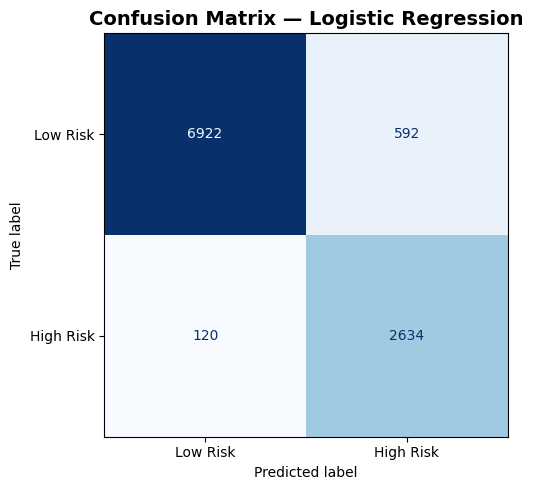

CONFUSION MATRIX INTERPRETATION

True Negatives  (TN) = 6,922  → Low Risk correctly predicted as Low Risk
False Positives (FP) = 592  → Low Risk WRONGLY flagged as High Risk
False Negatives (FN) = 120  → High Risk MISSED and predicted as Low Risk
True Positives  (TP) = 2,634  → High Risk correctly caught

• Precision (High Risk) = 81.6% → Of all predicted High Risk, this many are actually High Risk
• Recall    (High Risk) = 95.6% → Of all actual High Risk, this many were caught
• Precision (Low Risk)  = 98.3% → Of all predicted Low Risk, this many are actually Low Risk
• Recall    (Low Risk)  = 92.1% → Of all actual Low Risk, this many were correctly identified

Overall Accuracy = 93.1%

KEY OBSERVATIONS:
    The model wrongly rejects 592 Low Risk applicants (False Positives).
      This means lost business from good applicants.
    The model correctly catches 2634 out of 2754 High Risk applicants.
    The model correctly approves 6922 out of 7514 Low Risk applicants.


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm.ravel()

fig, ax = plt.subplots(figsize=(7, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    display_labels=["Low Risk", "High Risk"],
    cmap="Blues", ax=ax,
    colorbar=False
)
ax.set_title("Confusion Matrix — Logistic Regression", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Interpret the confusion matrix
print("=" * 55)
print("CONFUSION MATRIX INTERPRETATION")
print("=" * 55)
print(f"""
True Negatives  (TN) = {tn:,}  → Low Risk correctly predicted as Low Risk
False Positives (FP) = {fp:,}  → Low Risk WRONGLY flagged as High Risk
False Negatives (FN) = {fn:,}  → High Risk MISSED and predicted as Low Risk
True Positives  (TP) = {tp:,}  → High Risk correctly caught

• Precision (High Risk) = {tp/(tp+fp):.1%} → Of all predicted High Risk, this many are actually High Risk
• Recall    (High Risk) = {tp/(tp+fn):.1%} → Of all actual High Risk, this many were caught
• Precision (Low Risk)  = {tn/(tn+fn):.1%} → Of all predicted Low Risk, this many are actually Low Risk
• Recall    (Low Risk)  = {tn/(tn+fp):.1%} → Of all actual Low Risk, this many were correctly identified

Overall Accuracy = {(tp+tn)/(tp+tn+fp+fn):.1%}
""")

print("KEY OBSERVATIONS:")
if fn > fp:
    print(f"    The model misses {fn} High Risk applicants (False Negatives).")
    print(f"      This is dangerous — risky borrowers are slipping through.")
else:
    print(f"    The model wrongly rejects {fp} Low Risk applicants (False Positives).")
    print(f"      This means lost business from good applicants.")
print(f"    The model correctly catches {tp} out of {tp+fn} High Risk applicants.")
print(f"    The model correctly approves {tn} out of {tn+fp} Low Risk applicants.")


## Coefficient Interpretation

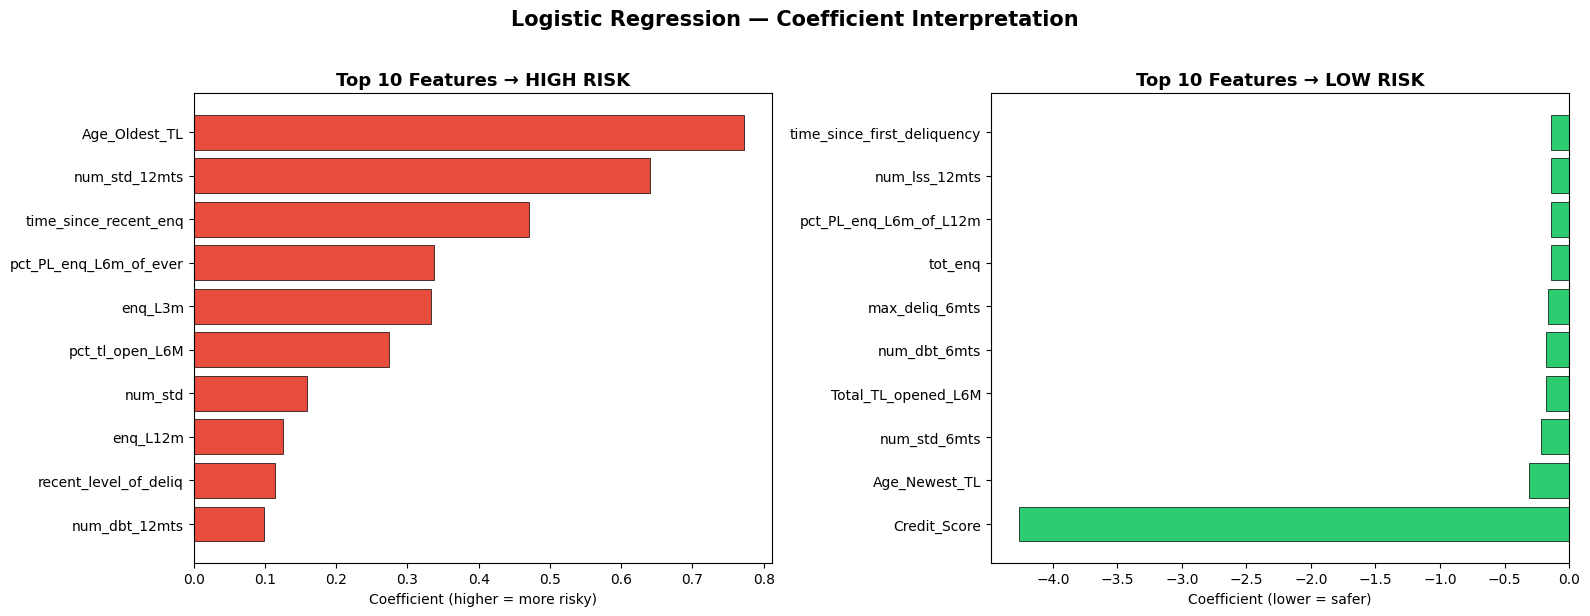

COEFFICIENT INTERPRETATION
Features that INCREASE risk of rejection (positive coef):
                             num_dbt_12mts  →  +0.0985
                     recent_level_of_deliq  →  +0.1147
                                  enq_L12m  →  +0.1250
                                   num_std  →  +0.1596
                           pct_tl_open_L6M  →  +0.2740
                                   enq_L3m  →  +0.3338
                    pct_PL_enq_L6m_of_ever  →  +0.3376
                     time_since_recent_enq  →  +0.4711
                             num_std_12mts  →  +0.6398
                             Age_Oldest_TL  →  +0.7724
Features that DECREASE risk (negative coef = safer):
                              Credit_Score  →  -4.2655
                             Age_Newest_TL  →  -0.3086
                              num_std_6mts  →  -0.2155
                       Total_TL_opened_L6M  →  -0.1816
                              num_dbt_6mts  →  -0.1789
                            max_deliq

In [51]:
# Top Logistic Regression Coefficients
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lr_model.coef_[0]
}).sort_values("Coefficient")

# Top 10 features pushing toward HIGH RISK (positive coefficients)
top_high_risk = coef_df.tail(10)
# Top 10 features pushing toward LOW RISK (negative coefficients)
top_low_risk  = coef_df.head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Features pushing toward High Risk
axes[0].barh(top_high_risk["Feature"], top_high_risk["Coefficient"],
             color="#e74c3c", edgecolor="black", linewidth=0.5)
axes[0].set_title("Top 10 Features → HIGH RISK", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Coefficient (higher = more risky)")

# Right: Features pushing toward Low Risk
axes[1].barh(top_low_risk["Feature"], top_low_risk["Coefficient"],
             color="#2ecc71", edgecolor="black", linewidth=0.5)
axes[1].set_title("Top 10 Features → LOW RISK", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Coefficient (lower = safer)")

plt.suptitle("Logistic Regression — Coefficient Interpretation",
             fontsize=15, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

# Print the values
print("" + "=" * 55)
print("COEFFICIENT INTERPRETATION")
print("=" * 55)
print("Features that INCREASE risk of rejection (positive coef):")
for _, row in top_high_risk.iterrows():
    print(f"  {row["Feature"]:>40s}  →  {row["Coefficient"]:+.4f}")
print("Features that DECREASE risk (negative coef = safer):")
for _, row in top_low_risk.iterrows():
    print(f"  {row["Feature"]:>40s}  →  {row["Coefficient"]:+.4f}")


## Model Improvement — Threshold Tuning

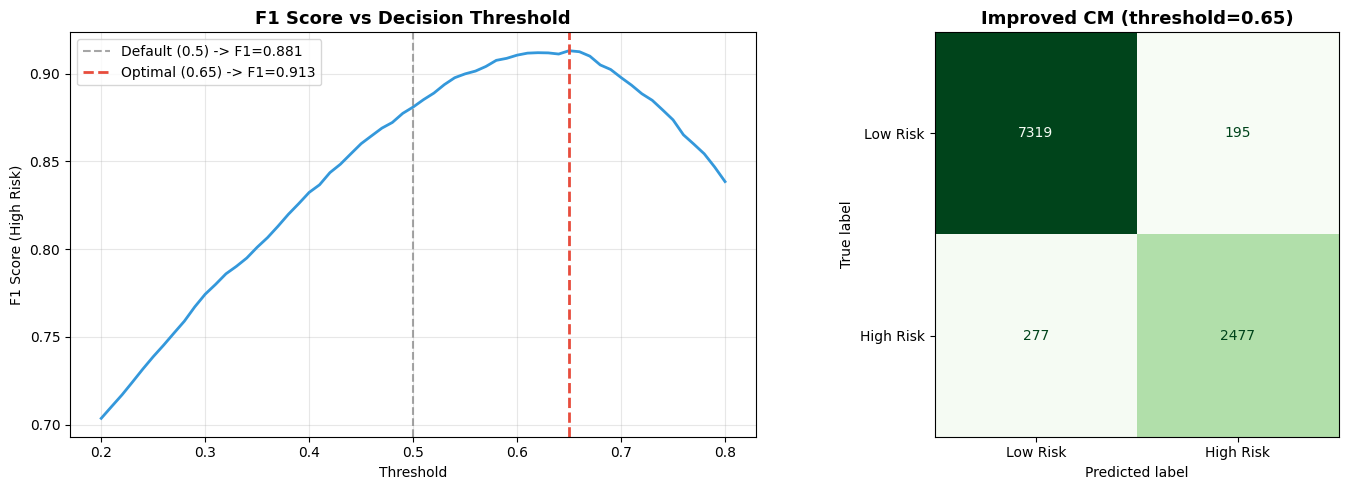

MODEL IMPROVEMENT SUMMARY

                        Metric   Before (0.50)           After
--------------------------------------------------------------
          F1 Score (High Risk)          0.8809          0.9130
                       ROC-AUC          0.9609          0.9609
 False Negatives (missed risk)             120             277
False Positives (wrong reject)             592             195
              High Risk Recall           95.6%           89.9%
              Overall Accuracy           93.1%           95.4%
F1 Score improved by 0.0321


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

# Current model performance at default threshold (0.5)
default_f1 = f1_score(y_test, y_pred_lr)
default_auc = roc_auc_score(y_test, y_prob_lr)

# Find optimal threshold using F1 score
thresholds = np.arange(0.2, 0.8, 0.01)
f1_scores = []
for t in thresholds:
    preds = (y_prob_lr >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Plot F1 vs Threshold
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(thresholds, f1_scores, color="#3498db", linewidth=2)
axes[0].axvline(x=0.5, color="gray", linestyle="--", alpha=0.7, label=f"Default (0.5) -> F1={default_f1:.3f}")
axes[0].axvline(x=best_threshold, color="#e74c3c", linestyle="--", linewidth=2,
                label=f"Optimal ({best_threshold:.2f}) -> F1={best_f1:.3f}")
axes[0].set_title("F1 Score vs Decision Threshold", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Threshold")
axes[0].set_ylabel("F1 Score (High Risk)")
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Show improved confusion matrix at optimal threshold
y_pred_tuned = (y_prob_lr >= best_threshold).astype(int)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_tuned,
    display_labels=["Low Risk", "High Risk"],
    cmap="Greens", ax=axes[1], colorbar=False
)
axes[1].set_title(f"Improved CM (threshold={best_threshold:.2f})", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# Compare before vs after
cm_old = confusion_matrix(y_test, y_pred_lr)
cm_new = confusion_matrix(y_test, y_pred_tuned)
tn_o, fp_o, fn_o, tp_o = cm_old.ravel()
tn_n, fp_n, fn_n, tp_n = cm_new.ravel()

print("=" * 55)
print("MODEL IMPROVEMENT SUMMARY")
print("=" * 55)
header = f'{"Metric":>30s}  {"Before (0.50)":>14s}  {"After":>14s}'
print(f"\n{header}")
print("-" * 62)
print(f'{"F1 Score (High Risk)":>30s}  {default_f1:>14.4f}  {best_f1:>14.4f}')
print(f'{"ROC-AUC":>30s}  {default_auc:>14.4f}  {default_auc:>14.4f}')
print(f'{"False Negatives (missed risk)":>30s}  {fn_o:>14,}  {fn_n:>14,}')
print(f'{"False Positives (wrong reject)":>30s}  {fp_o:>14,}  {fp_n:>14,}')
print(f'{"High Risk Recall":>30s}  {tp_o/(tp_o+fn_o):>14.1%}  {tp_n/(tp_n+fn_n):>14.1%}')
print(f'{"Overall Accuracy":>30s}  {(tp_o+tn_o)/len(y_test):>14.1%}  {(tp_n+tn_n)/len(y_test):>14.1%}')

if fn_n < fn_o:
    print(f"\n Threshold tuning reduced missed High Risk applicants by {fn_o - fn_n}!")
if best_f1 > default_f1:
    print(f"F1 Score improved by {best_f1 - default_f1:.4f}")


# Model 2: Decision Tree

## Model Training

## Model Evaluation

## Feature Importance

# Model Comparison